In [1]:
# # This file is part of Theano Geometry
#
# Copyright (C) 2017, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/theanogemetry
#
# Theano Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Theano Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Theano Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# LDDMM landmark dynamics
Statistical shape analysis 2019, exercise session 2

In [2]:
%cd ..

/home/stefan/projects/theanogeometry


In [3]:
from src.manifolds.landmarks import *
M = landmarks(2)
print(M)

from src.plotting import *

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


2 landmarks in R^2 (dim 4). kernel Gaussian, k_alpha=1, k_sigma=[[0.5 0. ]
 [0.  0.5]]


In [4]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

# Hamiltonian dynamics
from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

# Logarithm map
from src.Riemannian import Log
Log.initialize(M,f=M.Exp_Hamiltonian)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


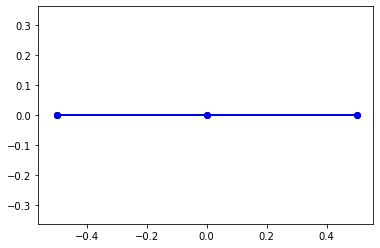

In [10]:
# example configuration
M.N.set_value(5) # number of landmarks
M.k_sigma.set_value(tensor(np.diag((.5,.5))))

q = tensor(np.vstack((np.linspace(-.5,.5,M.N.eval()),np.zeros(M.N.eval()))).T.flatten())

M.plot()
M.plotx(q,curve=True)
plt.show()

## Sample Data

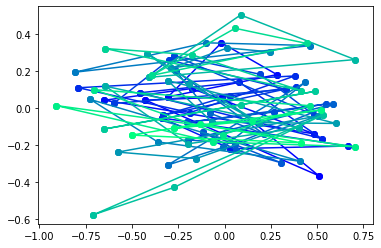

In [11]:
# sample some data - here from a Brownian motion
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

var = .2
N_samples = 10

samples = np.zeros((N_samples,M.dim.eval()))
for i in range(N_samples):
    (ts,qs) = M.Brownian_coordsf(q,var*dWsf(M.dim.eval()))
    #v = tensor(np.vstack((.01*np.random.randn(M.N.eval()),.2*np.random.randn(M.N.eval()))).T.flatten())
    #p = M.flatf(q,v) # momentum
    #qs = M.Exp_Hamiltoniantf(q,p).T
    samples[i] = qs[-1]

# plot
colormap = plt.get_cmap('winter')
colors=[colormap(k) for k in np.linspace(0, 1, N_samples)]
M.plot()
for i in range(N_samples):
    M.plotx(samples[i],curve=True,color=colors[i])
plt.show()

## Frechet mean

In [ ]:
from src.statistics.Frechet_mean import *

res = Frechet_mean(M,lambda *args: M.Logf(*args), samples)
Fm = res[0]
print("loss = ", res[1])
print("mean = ", Fm)
iterations = res[2]

M.plot()
M.plotx(Fm,curve=True)
M.plotx(iterations,curve=True)
plt.show()

## Tangent PCA

In [ ]:
from src.statistics.Tangent_PCA import *

from src.utils import *
from sklearn.decomposition import PCA

pca = tangent_PCA(M,lambda *args: M.Logf(*args),Fm,samples)
print(pca.get_covariance())

plt.scatter(pca.transformed_Logs[:, 0], pca.transformed_Logs[:, 1])
plt.axis('equal')
plt.show()